In [1]:
from pylab import *
from numpy import *
%matplotlib inline

# 3. 
Se  tiene  una particula  de  masa $m= 1$  en  un  campo  gravitacional $g=-9.8 \hat{j}$ en una caja con $L=10m$ y $d=3m$. Realice  los  ejercicios  con  valores  de $\alpha = \pi /6$  y $\alpha=\pi /10$.

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange (len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
         for i in xrange (len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    
    return tiempos,sol

In [3]:
def ec_mov(r_v,t,fricc=0,g=9.8,m=1):
    u = sqrt([r_v[2]**2 + r_v[3]**2])
    dx = r_v[2]
    dy = r_v[3]
    if fricc == 0:
        dvx,dvy = 0,-(g/m)
    else:
        dvx = - fricc([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fricc([r_v[2],r_v[3]])[1]

    return array([dx,dy,dvx,dvy])

In [4]:
def fricc_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fricc_v2(v,gamma=0.1):
    norma_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norma_v*v[0]
    f_y = gamma*norma_v*v[1]
    return array([f_x,f_y])

In [5]:
def bote(rv_i,mi_dt,fricc,alpha,caja):   
    dt_b = (mi_dt)/2
    y_izq = rv_i
    t,sol = rk4(ec_mov,rv_i,[0,dt_b],fricc)
    y_med = sol[-1,:]
    while abs(y_izq[1]) > abs(caja):
        reinicio = y_med
        dt_b = dt_b/2
        t,sol = rk4(ec_mov,reinicio,[0,dt_b],fricc)
        y_izq = reinicio
        y_med = sol[-1,:]
    if  y_izq[0] < 5:   
        v_0=   sin(alpha),cos(alpha)
        v_i = 1,0
        d = 1
    else:
        v_0 =  -sin(alpha),cos(alpha)
        v_i = -1,0
        d = -1   
    ang = arccos((-v_0[0]*y_izq[2] - v_0[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)))
    ang_aux = arccos((-v_i[0]*y_izq[2] - v_i[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)))
    if ang_aux > (pi/2-alpha):
        ang=-d*ang
    else:
        ang= d*ang
    y_izq2 =  -cos(2*ang)*(y_izq[2]) + sin(2*ang)*(y_izq[3]) 
    y_izq3 =  -sin(2*ang)*(y_izq[2]) - cos(2*ang)*(y_izq[3]) 
    y_izq = array([y_izq[0],y_izq[1],y_izq2,y_izq3])  
    return y_izq

In [6]:
def rebote(rv_i,mi_dt,fricc):   
    dt_b = (mi_dt)/2
    y_izq = rv_i
    t,sol = rk4(ec_mov,rv_i,[0,dt_b],fricc)
    y_med = sol[-1,:]
    while abs(y_izq[0]) > 10:
       
        reinicio = y_med
        dt_b = dt_b/2
        t,sol = rk4(ec_mov,reinicio,[0,dt_b],fricc)
        y_izq = reinicio
        y_med = sol[-1,:]
      
    y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])    
    return y_izq

In [7]:
def rerebote(rv_i,mi_dt,fricc):
    dt_b=mi_dt/2
    y_izq=rv_i #vector de posicion inicial
    t,sol=rk4(ec_mov,rv_i,[0,dt_b],fricc)
    y_med=sol[-1,:]
    while abs(y_izq[0]) < 0:
        reini=y_med
        dt_b=dt_b/2
        t,sol=rk4(ec_mov,reini,[0,dt_b],fricc_v)
        y_izq=reini
        y_med=sol[-1,:]
    y_izq=array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
    return y_izq 

In [8]:
def rererebote(rv_i,mi_dt,fricc):
    dt_b = (mi_dt)/2
    y_izq = rv_i
    t,sol = rk4(ec_mov,rv_i,[0,dt_b],fricc)
    y_med = sol[-1,:]
    while abs(y_izq[1]) > 5.9:  
        reinicio = y_med
        dt_b = dt_b/2
        t,sol = rk4(ec_mov,reinicio,[0,dt_b],fricc)
        y_izq = reinicio
        y_med = sol[-1,:]
      
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])    
    return y_izq

In [9]:
def mov(alpha,beta,N,fricc):
    r = 0
    v_y = cos(beta)
    v_x = sin(beta) 
    h = -f(5,alpha,0)
    x_i = 5./3.
    y_i = f(x_i,alpha,h) 
    inicio = [x_i,y_i,v_x,v_y] 
                     
    trayectoria = zeros((N,len(inicio)))
    mi_dt = .01
    trayectoria[0,:] = array(inicio)
    for i in range(N-1):
        t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
        caja = f(sol_dt[-1,:][0],alpha,h) 
        if sol_dt[-1,:][1] < caja: 
            p = bote(trayectoria[i,:],mi_dt,fricc,alpha,caja)
            trayectoria[i+1,:] = p 
            r +=1
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]      
        if sol_dt[-1,:][1] > 5.9: 
            punto = rererebote(trayectoria[i,:],mi_dt,fricc)
            trayectoria[i+1,:] = p
            r +=1
        if sol_dt[-1,:][0] > 10: 
            p = rebote(trayectoria[i,:],mi_dt,fricc)
            trayectoria[i+1,:] = p
            r +=1
        if sol_dt[-1,:][0] < 0: 
            p = rerebote(trayectoria[i,:],mi_dt,fricc)
            trayectoria[i+1,:] = p
            r +=1
    return trayectoria[:,0],trayectoria[:,1],trayectoria[:,2],trayectoria[:,3]         

In [10]:
def inc(omega):
    m= -tan(omega)
    return m
def f(x,omega,h):
    if abs(x) <= 5:
        y=x*inc(omega)+h
    else:
        y=-x*inc(omega)-h   
    return y

a) Realice una simulacion con condicion inicial tal que la posicion inicial esta sobre la rampa a un tercio de la distancia de la pared vertical izquierda y el vertice inferior de la caja, y se dispara con velocidad $|\vec{v}|=1$
hacia la derecha con angulos sobre la horizontal $\alpha$, $2\alpha$, y $3\alpha$. (Para que la simulacion sea valida, la particula debe rebotar al menos 20 veces con alguna parte de la caja).

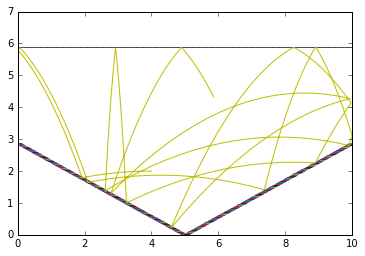

In [11]:
fricc = 0
r = 0 
a1= pi/6
h= -f(5,a1,0)
x_i = 5./3.
y_i = f(x_i,a1,h) 
p_ini = [4,2,-10,0]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a1,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a1,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5.9:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
omega=a1
p=arange(0,10,0.01)
x,y=5./3,tan(omega)*(5-(5./3))

x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                      # y el plano donde rebota la pelota
show()


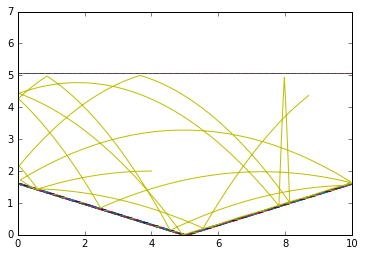

In [12]:
fricc = 0
r = 0 
a2= pi/10
h= -f(5,a2,0)
x_i = 5./3.
y_i = f(x_i,a2,h) 
p_ini = [4,2,-10,0]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a2,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a2,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
p=arange(0,10,0.01)
a1,a2=pi/6,pi/10
omega=a2
x,y=5./3,tan(omega)*(5-(5./3))
x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3.45)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                       # y el plano donde rebota la pelota
show()


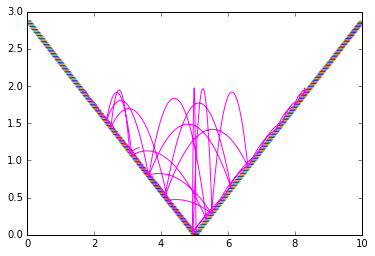

In [13]:
a1=pi/6
omega=a1
fricc=0
N=1500
h = -f(5,a1,0)
sol = mov(a1,2*a1,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

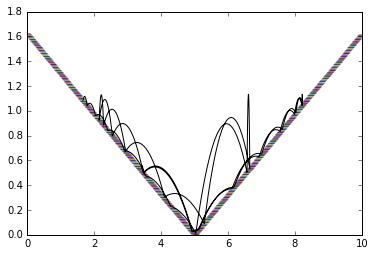

In [14]:
a2=pi/10
omega=a2
N=1000
h = -f(5,a2,0)
sol = mov(a2,2*a2,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1])
show()

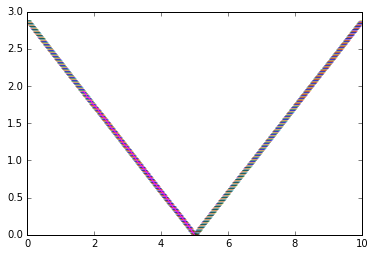

In [15]:
a1=pi/6
omega=a1
N=1000
h = -f(5,a1,0)
sol = mov(a1,3*a1,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

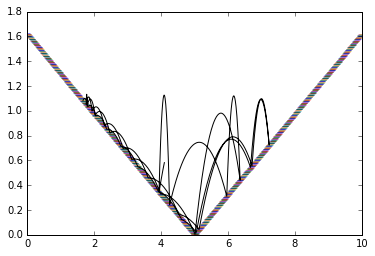

In [16]:
a2=pi/10
omega=a2
N=1000
h = -f(5,a2,0)
sol = mov(a2,3*a2,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1])
show()

b) Introduzca algun modelo de friccion y compare las trayectorias con el inciso anterior.

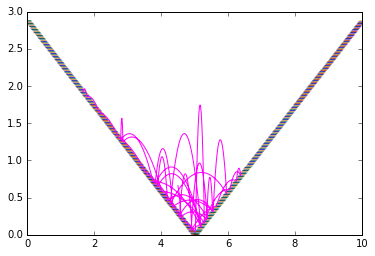

In [17]:
a1=pi/6
omega=a1
N=1500
 
h = -f(5,a1,0)
sol = mov(a1,a1,N,fricc_v)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()



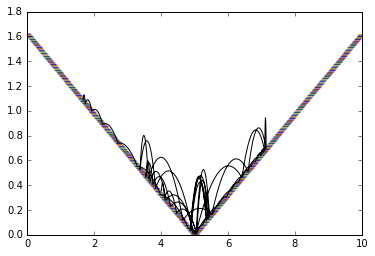

In [18]:
a2=pi/10
omega=a2
N=1500
 
h = -f(5,a2,0)
sol = mov(a2,a2,N,fricc_v)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],)
show()

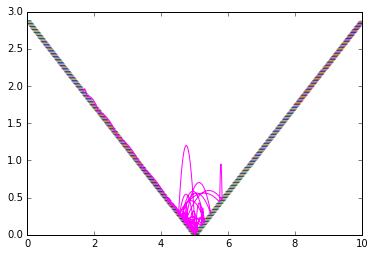

In [19]:
a1=pi/6
omega=a1
N=1500
 
h = -f(5,a1,0)
sol = mov(a1,a1,N,fricc_v2)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

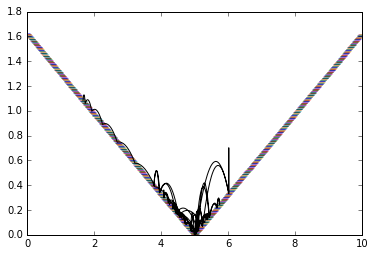

In [20]:
a2=pi/10
omega=a2
N=1500
 
h = -f(5,a2,0)
sol = mov(a2,a2,N,fricc_v2)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],)
show()

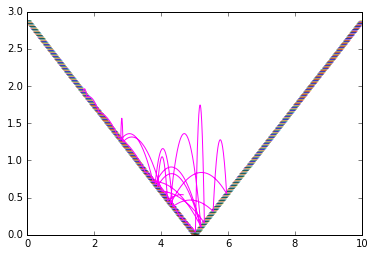

In [21]:
a1=pi/6
omega=a1
N=1000
fricc=fricc_v 
h = -f(5,a1,0)
sol = mov(a1,a1,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

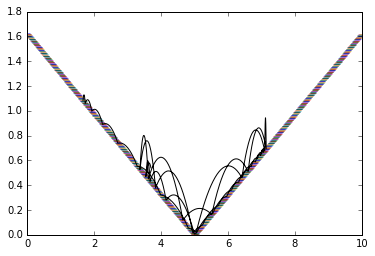

In [22]:
a2=pi/10
omega=a2
N=1000
fricc=fricc_v 
h = -f(5,a2,0)
sol = mov(a2,a2,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],)
show()

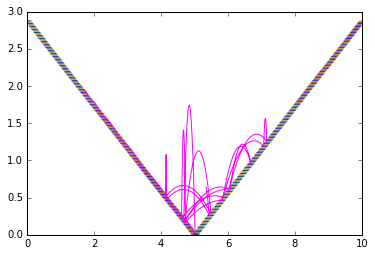

In [23]:
a1=pi/6
N=1000
omega=a1
fricc=fricc_v 
h = -f(5,a1,0)
sol = mov(a1,2*a1,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

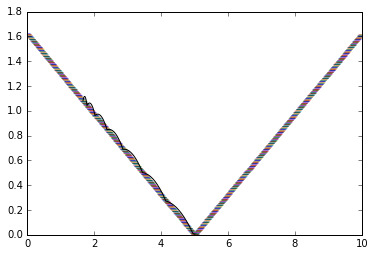

In [24]:
a2=pi/10
omega=a2
N=1000
fricc=fricc_v 
h = -f(5,a2,0)
sol = mov(a2,2*a2,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],)
show()

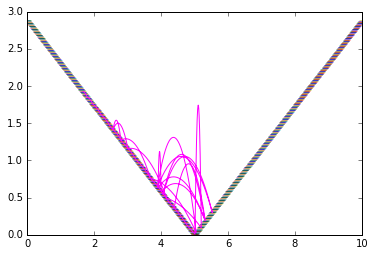

In [25]:
a1=pi/6
N=1000
omega=a1
fricc=fricc_v 
h = -f(5,a1,0)
sol = mov(a1,3*a1,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

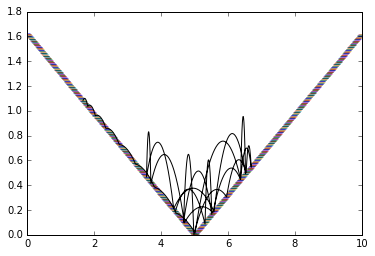

In [26]:
a2=pi/10
omega=a2
N=1000
fricc=fricc_v 
h = -f(5,a2,0)
sol = mov(a2,3*a2,N,fricc)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],)
show()

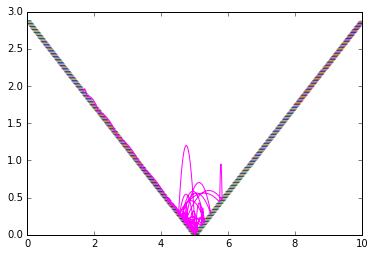

In [27]:
a1=pi/6
omega=a1
N=1500
fricc=fricc_v2
h = -f(5,a1,0)
sol = mov(a1,a1,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

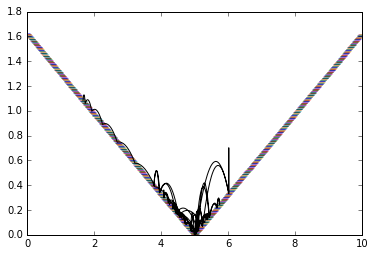

In [28]:
a2=pi/10
omega=a2
N=1500
fricc=fricc_v2
h = -f(5,a2,0)
sol = mov(a2,a2,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1])
show()

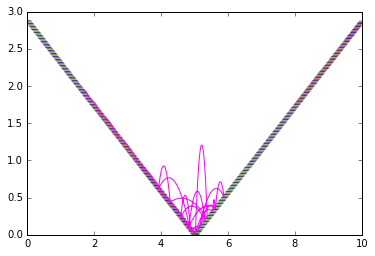

In [29]:
a1=pi/6
omega=a1
N=1500
fricc=fricc_v2
h = -f(5,a1,0)
sol = mov(a1,2*a1,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()

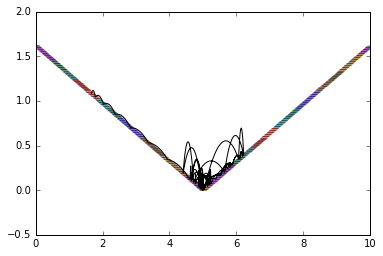

In [30]:
a2=pi/10
omega=a2
N=1500
fricc=fricc_v2
h = -f(5,a2,0)
sol = mov(a2,2*a2,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1])
show()

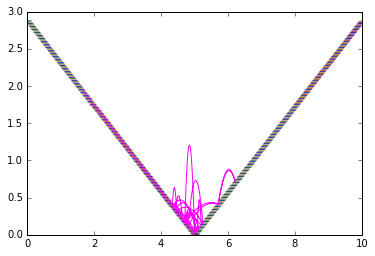

In [31]:
a1=pi/6
omega=a1
N=1000
fricc=fricc_v2
h = -f(5,a1,0)
sol = mov(a1,3*a1,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1],color='magenta')
show()


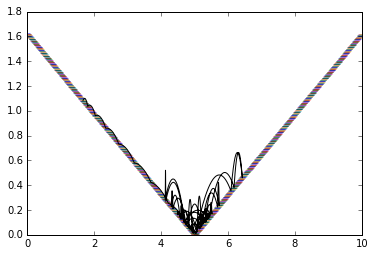

In [32]:
a2=pi/10
omega=a2
N=1500
fricc=fricc_v2
h = -f(5,a2,0)
sol = mov(a2,3*a2,N,fricc)

def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    
x=linspace(0,5)
y=linspace(5,10)
plot(sol[0],sol[1])
show()

c) Realice  los  ejercicios para $|\vec{v}|= 25$ y $|\vec{v}|= 60$. 
Describa  las similitudes y diferencias entre las distintas simulaciones.

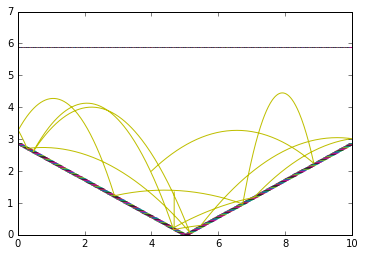

In [33]:
fricc = 0
r = 0 
a1= pi/6
h= -f(5,a1,0)
x_i = 5./3.
y_i = f(x_i,a1,h) 
p_ini = [4,2,5,5]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a1,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a1,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5.9:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
omega=a1
p=arange(0,10,0.01)
x,y=5./3,tan(omega)*(5-(5./3))

x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                       # y el plano donde rebota la pelota
show()


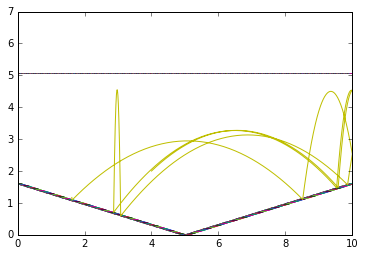

In [34]:
fricc = 0
r = 0 
a2= pi/10
h= -f(5,a2,0)
x_i = 5./3.
y_i = f(x_i,a2,h) 
p_ini = [4,2,5,5]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a2,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a2,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
p=arange(0,10,0.01)
a1,a2=pi/6,pi/10
omega=a2
x,y=5./3,tan(omega)*(5-(5./3))
x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3.45)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                       # y el plano donde rebota la pelota
show()

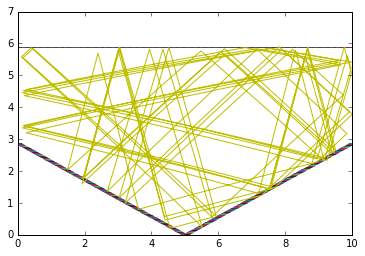

In [35]:
fricc = 0
r = 0 
a1= pi/6
h= -f(5,a1,0)
x_i = 5./3.
y_i = f(x_i,a1,h) 
p_ini = [4,2,30,30]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a1,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a1,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5.9:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
omega=a1
p=arange(0,10,0.01)
x,y=5./3,tan(omega)*(5-(5./3))

x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                        # y el plano donde rebota la pelota
show()

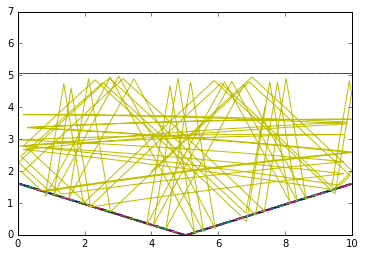

In [36]:
fricc = 0
r = 0 
a2= pi/10
h= -f(5,a2,0)
x_i = 5./3.
y_i = f(x_i,a2,h) 
p_ini = [4,2,30,30]
N = 1000 
trayectoria = zeros((N,len(p_ini)))
mi_dt = .01
trayectoria[0,:]=array(p_ini)

for i in range(N-1):
    t,sol_dt = rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
    caja = f(sol_dt[-1,:][0],a2,h) 
    if sol_dt[-1,:][1] < caja:
        p = bote(trayectoria[i,:],mi_dt,fricc,a2,caja)
        trayectoria[i+1,:] = p 
        r +=1
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]  
        
    if sol_dt[-1,:][1] > 5:
        p = rererebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
    if sol_dt[-1,:][0] > 10:
        p = rebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p 
        r +=1
    if sol_dt[-1,:][0] < 0:
        p = rerebote(trayectoria[i,:],mi_dt,fricc)
        trayectoria[i+1,:] = p
        r +=1
        
p=arange(0,10,0.01)
a1,a2=pi/6,pi/10
omega=a2
x,y=5./3,tan(omega)*(5-(5./3))
x_v,y_v=cos(omega),sin(omega)

def techo(x):
    return (tan(omega)*5+3.45)
def piso(x):
    if 0<= x <=5:
        return (-tan(omega)*x)+(tan(omega)*5)
    else:
        return (tan(omega)*x)-(tan(omega)*5)
for n in p:
    plot(n,piso(n),'_')
    plot(n,techo(n),'_')

x=linspace(0,5)
y=linspace(5,10)
plot(trayectoria[:,0],trayectoria[:,1],'-')
ylim(0,7)
                                                       # y el plano donde rebota la pelota
show()

d) Dibuje el espacio fase $(p_x,x)$ y $(p_y,y)$ cuando no hay friccion y la particula es lanzada hacia la derecha a un angulo $\alpha$ y vertical hacia arriba.  Tome en cuenta el numero necesario de rebotes para que la simulacion pueda barrer el espacio fase de manera representativa.

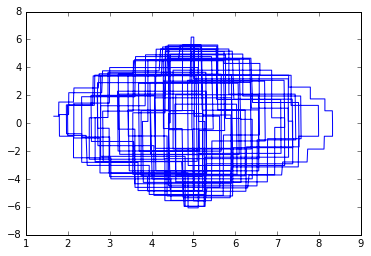

In [ ]:
a1=pi/6
N=10000
fricc=0
h=-f(5,a1,0)
sol=mov(a1,a1,N,fricc)
plot(sol[0],sol[2])
show()

In [ ]:
a1=pi/6
N=5000
fricc=0
h=-f(5,a1,0)
sol=mov(a1,a1,N,fricc)
plot(sol[1],sol[3])
show()

In [ ]:
a2=pi/10
N=10000
fricc=0
h=-f(5,a2,0)
sol=mov(a2,a2,N,fricc)
plot(sol[0],sol[2],'.')
show()

In [ ]:
a2=pi/10
N=10000
fricc=0
h=-f(5,a2,0)
sol=mov(a2,a2,N,fricc)
plot(sol[1],sol[3],'.')
show()

# 4.  
Se tiene una particula de masa $m= 1$ en una caja circular.  Los radios son $a$ y $b$ de tal forma que $b= 2a$.

a)  Realice  una  simulacion  en  donde  la  particula  realiza  varios  rebotes  en  las  paredes  de  la  caja.
Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior.

b) ¿Existen condiciones iniciales que hagan que la particula quede encasillada en solo un sector de
la caja?.  De ser asi muestre cuales son tales condiciones o demuestre porque no se pueden obtener
dicha situacion.

c)  Si ahora se tiene un campo gravitacional uniforme $\vec{g}= 10\hat{n}$. Que condiciones iniciales se tendran que cumplir para que la particula solo pueda ocupar la mitad de la dona.